# Optimizing Fortran and Python code

> “Premature optimization is the root of all evil” - Donald Knuth

Optimization is a program transformation technique, which tries to improve the code by making it consume less resources (i.e. CPU, Memory) and deliver high speed. In optimization, high-level general programming constructs are replaced by very efficient low-level programming codes.

A few things to keep in mind before trying to optimize your code:

* Optimization must not, in any way, change the meaning of the program.

* Optimization should increase the speed of the program and if possible, the program should demand less number of resources.

* Optimization should be "weighed-in"; your time is more precious than the computer's.

That being said, there are a lot of time- and effort-efficient approaches to optimization. Here, some will be presented for Python and Fortran.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numba import jit 
import math
import dbscanf2py # Import the extension module file dbscanf2py.so

## Sum function

The speed of different sum functions is compared.

In [3]:
# A pure python funcion
def sum_0(arr):
    M, N = arr.shape
    result = 0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result

# A NumPy version of the previous funcion
def sum_1(arr):
    return np.sum(arr)

# The numba-optimized version of the first function
@jit
def sum_2(arr):
    M, N = arr.shape
    result = 0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result

# The numba-optimized version of the second function
@jit
def sum_3(arr):
    return np.sum(arr)

# Fortran function, brought to you by F2Py
import array_sum

# an array to test our functions
a = np.arange(65536).reshape(256,256)

In [4]:
%timeit sum_0(a) # Python
%timeit sum_1(a) # NumPy
%timeit sum_2(a) # Numba
%timeit sum_3(a) # NumPy + Numba
%timeit array_sum.array_sum(a) # F2Py

10 loops, best of 3: 19.7 ms per loop
10000 loops, best of 3: 54.3 µs per loop
The slowest run took 16114.08 times longer than the fastest. This could mean that an intermediate result is being cached 
1 loops, best of 3: 25 µs per loop
The slowest run took 2115.74 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 34.4 µs per loop
10000 loops, best of 3: 139 µs per loop


### Let's %timeit

In [5]:
x = [8, 16, 32, 64, 128, 256]
y_py = [0.0000236, 0.0000865, 0.000323, 0.00125, 0.00544, 0.0217]
y_np = [0.00000555, 0.00000543, 0.00000633, 0.00000883, 0.0000189, 0.0000541]
y_nu = [0.000000329, 0.000000422, 0.000000667, 0.00000177, 0.00000605, 0.0000245]
y_npnu = [0.000000302, 0.00000038, 0.000000681, 0.00000229, 0.0000083, 0.0000343]
y_f2py = [0.000000935, 0.00000125, 0.00000198, 0.00000448, 0.0000254, 0.000139]
y_fo_o0 = [2.00001523e-06, 3.99991404e-06, 9.00006853e-06, 3.20002437e-05, 5.90002164E-05, 5.69000840e-04]
y_fo_o3 = [1.00000761e-06, 1.00000761E-06, 1.00000761E-06, 1.00000761E-06, 1.00000761E-06, 1.00000761E-06]

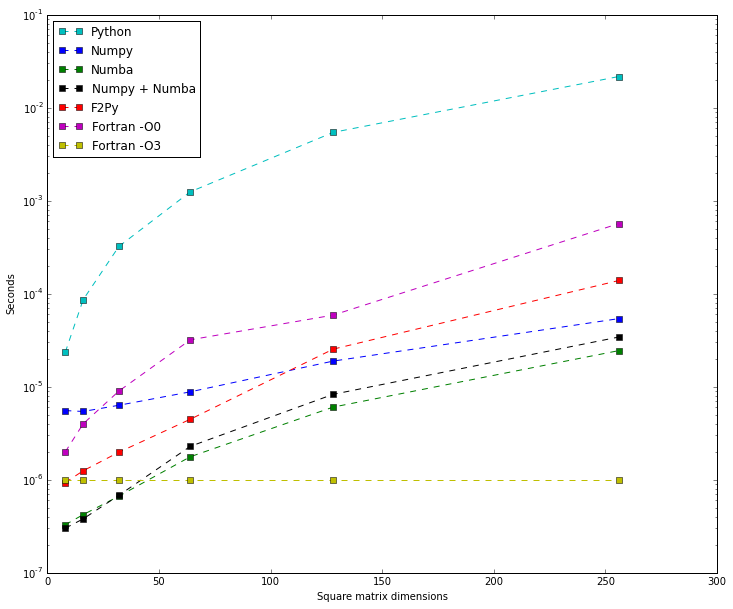

In [6]:
fig = plt.figure(figsize=(12, 10), dpi=100)
plt.plot(x, y_py, 'cs--', label="Python")
plt.plot(x, y_np, 'bs--', label="Numpy")
plt.plot(x, y_nu, 'gs--', label="Numba")
plt.plot(x, y_npnu, "ks--", label="Numpy + Numba")
plt.plot(x, y_f2py, 'rs--', label="F2Py")
plt.plot(x, y_fo_o0, "ms--", label="Fortran -O0")
plt.plot(x, y_fo_o3, "ys--", label="Fortran -O3")
plt.ylabel('Seconds')
plt.xlabel("Square matrix dimensions")
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')
plt.legend(loc=2);

## Factorial functions

The speed of different factorial functions is compared.

In [7]:
# Pure Python
def factorial_0(n):
    Ans = 1
    for i in range(1, n+1):
        Ans = Ans * i
    return Ans

# NumPy function
def factorial_1(n):
    return np.math.factorial(n)

# Numba-optimized pure Python function
@jit
def factorial_2(n):
    Ans = 1
    for i in range(1, n+1):
        Ans = Ans * i
    return Ans

# Numba-optimized NumPy function
@jit
def factorial_3(n):
    return np.math.factorial(n)

# Recursive Fortran function, compiled with F2Py 
import factorial1f2py

# Non-recursive Fortran function, compiled with F2Py 
import factorial2f2py

In [8]:
%timeit factorial_0(12)
%timeit factorial_1(12)
%timeit factorial_2(12)
%timeit factorial_3(12)
%timeit factorial1f2py.factorial(12)
%timeit factorial2f2py.factorial(12)

The slowest run took 4.69 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.48 µs per loop
The slowest run took 4.86 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 588 ns per loop
The slowest run took 156400.17 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 277 ns per loop
The slowest run took 49644.24 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 672 ns per loop
The slowest run took 12.37 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 231 ns per loop
The slowest run took 12.05 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 237 ns per loop


### Let's %timeit

In [9]:
x = [1, 3, 6, 12]
y_py = [673, 814, 1030, 1460]
y_np = [342, 376, 430, 601]
y_nu = [256, 258, 274, 262]
y_npnu = [388, 409, 476, 622]
y_f2py1 = [195, 200, 234, 252]
y_f2py2 = [205, 198, 204, 218]

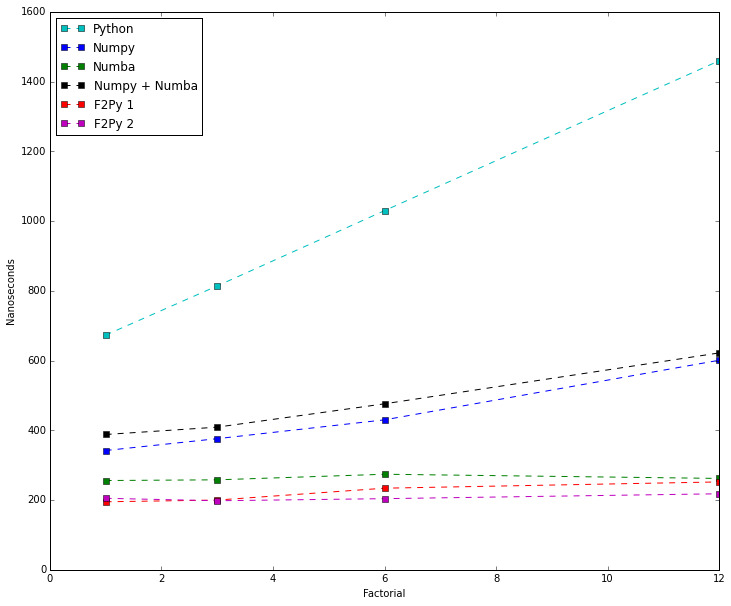

In [10]:
fig = plt.figure(figsize=(12, 10), dpi=100)
plt.plot(x, y_py, 'cs--', label="Python")
plt.plot(x, y_np, 'bs--', label="Numpy")
plt.plot(x, y_nu, 'gs--', label="Numba")
plt.plot(x, y_npnu, "ks--", label="Numpy + Numba")
plt.plot(x, y_f2py1, 'rs--', label="F2Py 1")
plt.plot(x, y_f2py2, "ms--", label="F2Py 2")
plt.ylabel('Nanoseconds')
plt.xlabel("Factorial")
ax = fig.add_subplot(1,1,1)
#ax.set_yscale('log')
plt.legend(loc=2);

## Dbscan clustering algorithm

It's a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

Each cluster is made up of core and non-core points. Points that are not included in any cluster are considered noise. A point p is a core point if at least min_points points are within distance eps of it, and those points are said to be directly reachable from p. 



<img src="plot_cluster_comparison_11.png" width=700>

<img src="dbscanilu.png" width=700>

In [26]:
UNCLASSIFIED = False
NOISE = None

def _dist(p,q):
	return math.sqrt(np.power(p-q,2).sum())

def _eps_neighborhood(p,q,eps):
	return _dist(p,q) < eps

def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    for i in range(0, n_points):
        if not i == point_id:
            if _eps_neighborhood(m[:,point_id], m[:,i], eps):
                seeds.append(i)
    return seeds

def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    seeds = _region_query(m, point_id, eps)
    if len(seeds) < min_points:
        classifications[point_id] = NOISE
        return False
    else:
        classifications[point_id] = cluster_id
        for seed_id in seeds:
            classifications[seed_id] = cluster_id
            
        while len(seeds) > 0:
            current_point = seeds[0]
            results = _region_query(m, current_point, eps)
            if len(results) >= min_points:
                for i in range(0, len(results)):
                    result_point = results[i]
                    if classifications[result_point] == UNCLASSIFIED or \
                       classifications[result_point] == NOISE:
                        if classifications[result_point] == UNCLASSIFIED:
                            seeds.append(result_point)
                        classifications[result_point] = cluster_id
            seeds = seeds[1:]
        return True
        
def dbscan(m, eps, min_points):
    """Implementation of Density Based Spatial Clustering of Applications with Noise
    See https://en.wikipedia.org/wiki/DBSCAN
    
    scikit-learn probably has a better implementation
    
    Uses Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each
    column vector in m.
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    for point_id in range(0, n_points):
        #point = m[:,point_id]
        if classifications[point_id] == UNCLASSIFIED:
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id = cluster_id + 1
    return classifications

def test_dbscan():
    m = np.matrix('1 1.2 0.8 3.7 3.9 3.6 10; 1.1 0.8 1 4 3.9 4.1 10')
    eps = 0.5
    min_points = 2
    assert dbscan(m, eps, min_points) == [1, 1, 1, 2, 2, 2, None]

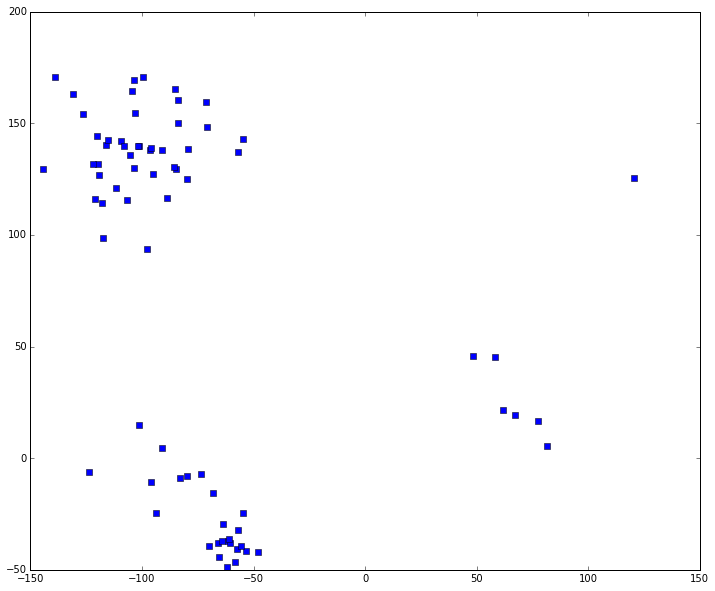

In [13]:
data = np.genfromtxt('easy_clust.txt')
x = data[:,0]
y = data[:,1]
fig = plt.figure(figsize=(12, 10), dpi=100)
plt.plot(x, y, 's');

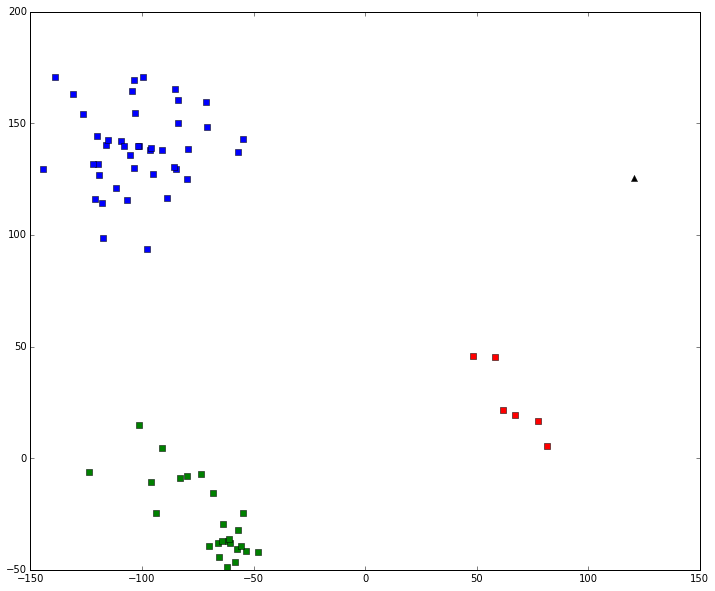

In [14]:
m = np.array([x, y])
eps = 30
min_points = 5
clusters = dbscan(m, eps, min_points)
#results
cnone = [[], []]
cone = [[], []]
ctwo = [[], []]
cthree = [[], []]

for index in range (len(clusters)):
    if clusters[index] == None:
        cnone[0].append(m[0, index])
        cnone[1].append(m[1, index])
    if clusters[index] == 1:
        cone[0].append(m[0, index])
        cone[1].append(m[1, index])
    if clusters[index] == 2:
        ctwo[0].append(m[0, index])
        ctwo[1].append(m[1, index])
    if clusters[index] == 3:
        cthree[0].append(m[0, index])
        cthree[1].append(m[1, index])

cone = np.array([cone[0], cone[1]])
cnone = np.array([cnone[0], cnone[1]])
ctwo = np.array([ctwo[0], ctwo[1]])
#print cone[0]
#print cnone
#print ctwo
fig = plt.figure(figsize=(12, 10), dpi=100)
plt.plot(cnone[0], cnone[1], 'k^', cone[0], cone[1], 'bs', ctwo[0], ctwo[1], "gs", cthree[0], cthree[1], "rs");


In [15]:
def make_circles(n=500, scatter=3):
    """
    Draw two concentric circles made of scattered points
    
    Parameters
    ----------
    n: int. Number of points in each circle
    scatter. float. Control the spread of the points.
    """

    r0 = 50 + np.random.normal(loc=0, scale=scatter, size=n)
    r1 = 25 + np.random.normal(loc=0, scale=scatter, size=n)
    r = np.concatenate((r0, r1))
    
    theta0 = np.linspace(0, np.pi*2, n)
    theta = np.concatenate((theta0, theta0))
    
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.vstack((x, y)).T

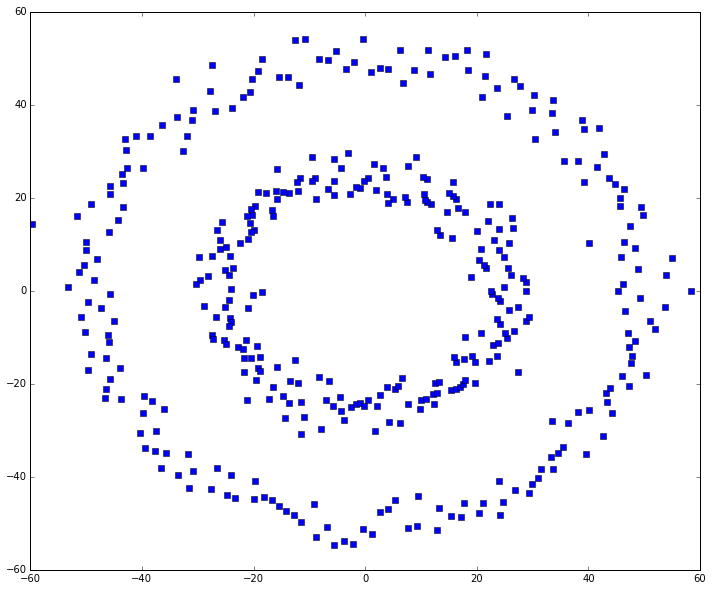

In [16]:
data_circ = make_circles(200, 3)
x = data_circ[:,0]
y = data_circ[:,1]
fig = plt.figure(figsize=(12, 10), dpi=100)
plt.plot(x, y, 's');

In [17]:
m = np.array([x, y])
eps = 9
min_points = 2

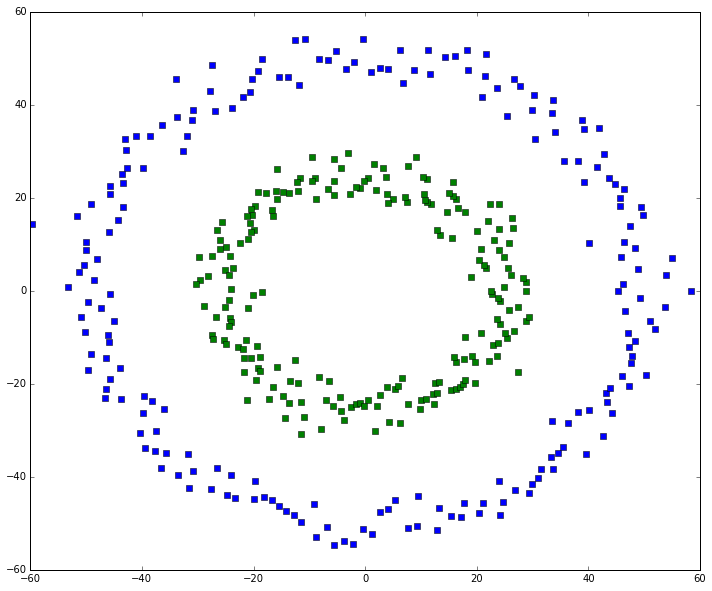

In [18]:
clusters = dbscan(m, eps, min_points)
cnone = [[], []]
cone = [[], []]
ctwo = [[], []]
cthree = [[], []]

for index in range (len(clusters)):
    if clusters[index] == None:
        cnone[0].append(m[0, index])
        cnone[1].append(m[1, index])
    if clusters[index] == 1:
        cone[0].append(m[0, index])
        cone[1].append(m[1, index])
    if clusters[index] == 2:
        ctwo[0].append(m[0, index])
        ctwo[1].append(m[1, index])
    if clusters[index] == 3:
        cthree[0].append(m[0, index])
        cthree[1].append(m[1, index])

cone = np.array([cone[0], cone[1]])
cnone = np.array([cnone[0], cnone[1]])
ctwo = np.array([ctwo[0], ctwo[1]])
fig = plt.figure(figsize=(12, 10), dpi=100)
plt.plot(cnone[0], cnone[1], 'k^', cone[0], cone[1], 'bs', ctwo[0], ctwo[1], "gs", cthree[0], cthree[1], "rs");


In [19]:
%timeit dbscan(m, eps, min_points)

1 loops, best of 3: 2.18 s per loop


## Dbscan with F2Py

In [21]:
print dbscanf2py.dist.__doc__ #F2Py automatically generates a docstring for our functions

dist = dist(p,q)

Wrapper for ``dist``.

Parameters
----------
p : input rank-1 array('f') with bounds (2)
q : input rank-1 array('f') with bounds (2)

Returns
-------
dist : float



In [22]:
def _eps_neighborhood(p,q,eps):
	return dbscanf2py.dist(p,q) < eps

In [23]:
%timeit dbscan(m, eps, min_points)

1 loops, best of 3: 450 ms per loop


## Dbscan with Numba

In [27]:
@jit
def _dist(p,q):
	return math.sqrt(np.power(p-q,2).sum())

In [28]:
%timeit dbscan(m, eps, min_points)

1 loops, best of 3: 2.42 s per loop


## Modifying the code

In [29]:
@jit
def _dist(p,q):
    return (sum((p-q)**2))**0.5

In [31]:
%timeit dbscan(m, eps, min_points)

1 loops, best of 3: 1.96 s per loop


### Let's %timeit

In [32]:
x = [250, 500, 1000, 2000]
y_np = [3.35, 12.4, 52.9, 217]
y_num = [2.74, 11.5, 45.1, 180]
y_nu = [3.57, 13.8, 57.8, 232]
y_f2py = [0.629, 2.64, 9.74, 38.6]

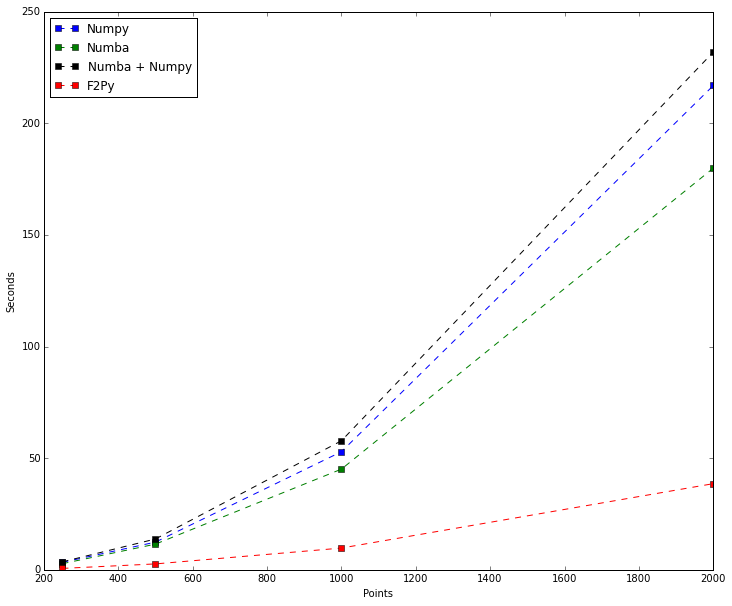

In [33]:
fig = plt.figure(figsize=(12, 10), dpi=100)
plt.plot(x, y_np, 'bs--', label="Numpy")
plt.plot(x, y_num, 'gs--', label="Numba")
plt.plot(x, y_nu, 'ks--', label="Numba + Numpy")
plt.plot(x, y_f2py, 'rs--', label="F2Py")
plt.ylabel('Seconds')
plt.xlabel("Points")
ax = fig.add_subplot(1,1,1)
#ax.set_yscale('log')
plt.legend(loc=2);

F2Py is between 4.35 and 4.66 times faster than the pure Python + Numba function on this machine. 

##Performance of different languages on a set of functions

<img src="julia-perf1.jpg" width=800>